In [17]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
STOP_WORDS = nltk.corpus.stopwords.words()
gatsby = open("./Gatsby.txt", "r", encoding=('utf-8')).read()
def tokenize(text):
    broken_text = text.replace('\n', ' ')
    result = []
    for i in nltk.tokenize.sent_tokenize(broken_text):
        temp = []
        for j in nltk.tokenize.word_tokenize(i):
            temp.append(j.lower())
        result.append(temp)
    return result
gatsby = tokenize(gatsby)

In [19]:
model = word2vec.Word2Vec(gatsby, size=100, window=20, min_count=10, workers=4)
model.wv['gatsby']

array([-0.02896748,  0.494246  , -0.33179563,  0.33080348,  0.03186917,
       -0.01872881,  0.32802293, -0.06700171,  0.14569362,  0.00718054,
        0.2995265 , -0.2090785 , -0.47389495, -0.02585295, -0.12924458,
       -0.29753602,  0.13582225, -0.05105737,  0.33195928, -0.05120247,
       -0.5575708 , -0.34948727, -0.3122471 ,  0.20418122,  0.3205753 ,
        0.04246176, -0.1662535 , -0.3862976 ,  0.15812624,  0.16211562,
        0.24732448, -0.1476454 , -0.28064865,  0.22562541,  0.23155561,
       -0.32044733, -0.03631099, -0.16025978, -0.19750847,  0.14243814,
        0.658152  ,  0.28836802,  0.25062144, -0.24772409,  0.5750533 ,
        0.03784615, -0.38328677,  0.14683479, -0.33603394, -0.1784918 ,
       -0.2987127 ,  0.08880617,  0.33811024, -0.06594151, -0.1734952 ,
       -0.04090013, -0.20179553,  0.00404661,  0.45685455,  0.254372  ,
       -0.02379063, -0.04231077, -0.44755575,  0.0670642 ,  0.34631047,
       -0.04411472,  0.2187519 ,  0.19539833,  0.17156039, -0.10

In [20]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

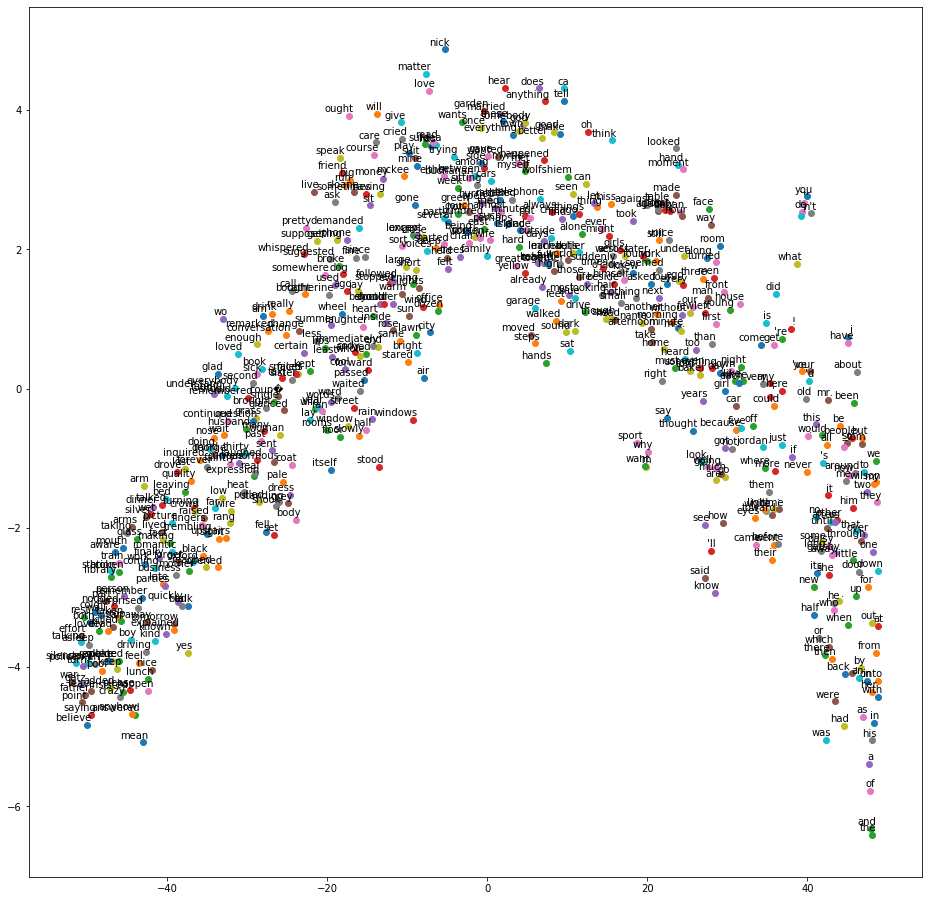

In [21]:
tsne_plot(model)

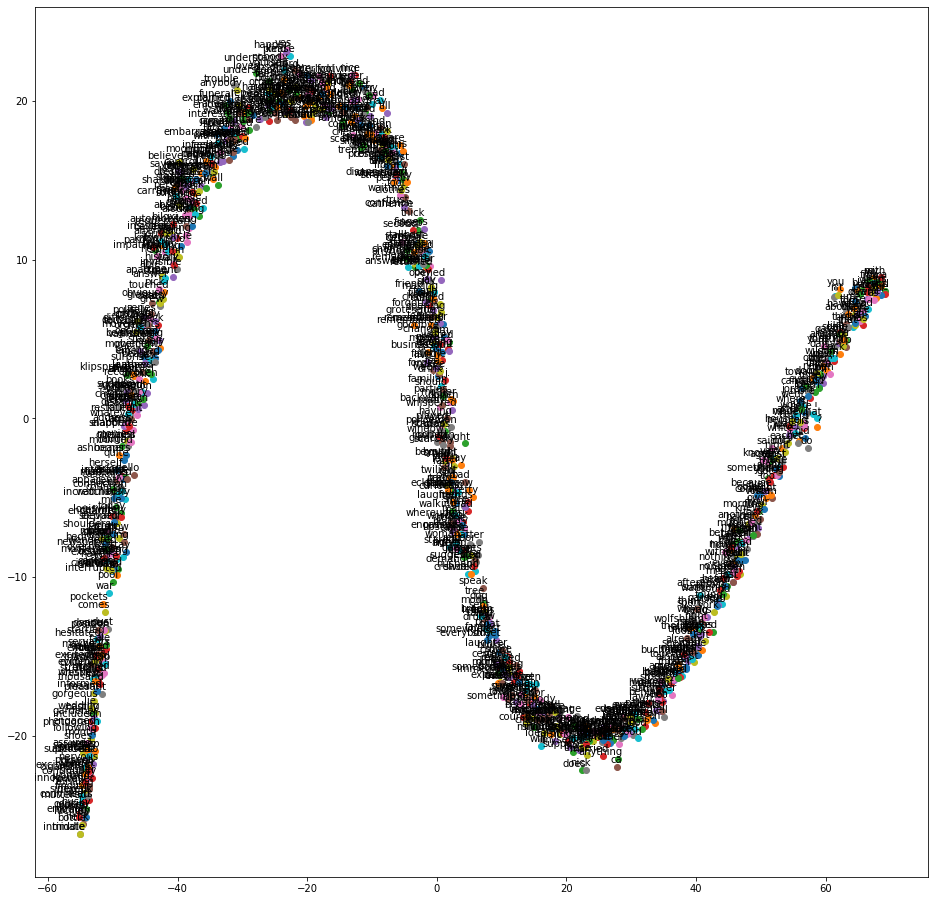

In [22]:
new_model = word2vec.Word2Vec(gatsby, size=100, window=20, min_count=5, workers=4)
tsne_plot(new_model)

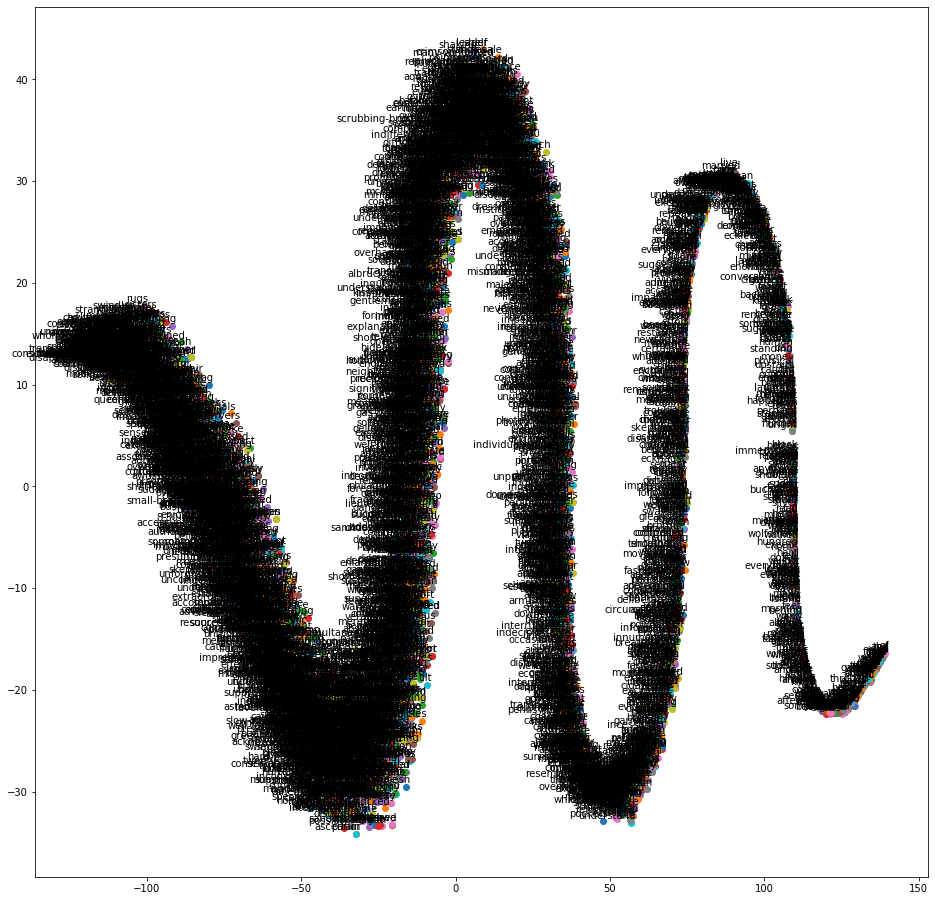

In [23]:
one_model = word2vec.Word2Vec(gatsby, size=100, window=20, min_count=1, workers=4)
tsne_plot(one_model)

In [29]:
model.most_similar('live', topn=100)

[("'re", 0.9992814064025879),
 ('your', 0.9992527961730957),
 ('anything', 0.9992421865463257),
 ('how', 0.9991911053657532),
 ("'ve", 0.9991771578788757),
 ('does', 0.9991686940193176),
 ('get', 0.9991617202758789),
 ('old', 0.9991509914398193),
 ("'d", 0.9991475343704224),
 ('will', 0.9991408586502075),
 ('have', 0.9991158246994019),
 ('go', 0.9991128444671631),
 ('are', 0.9991084933280945),
 ('going', 0.9990713000297546),
 ('ought', 0.9990624189376831),
 ('is', 0.9990592002868652),
 ('well', 0.999056339263916),
 ('much', 0.9990547299385071),
 ('here', 0.9990542531013489),
 ('come', 0.9990530610084534),
 ('hear', 0.9990482330322266),
 ('make', 0.9990476369857788),
 ('tell', 0.9990426898002625),
 ('say', 0.9990335702896118),
 ('see', 0.9990269541740417),
 ('i', 0.9990153312683105),
 ('look', 0.9989703893661499),
 ('matter', 0.998969316482544),
 ('love', 0.9988954067230225),
 ('ca', 0.9988670945167542),
 ('thought', 0.9988599419593811),
 ('can', 0.9988337755203247),
 ('better', 0.99882

In [25]:
new_model.most_similar('enchanted')

[('discovered', 0.9954184293746948),
 (';', 0.9953475594520569),
 ('under', 0.9953458309173584),
 ('thin', 0.9953398704528809),
 ('those', 0.9953138828277588),
 ('full', 0.9952710270881653),
 ('where', 0.995267391204834),
 ('own', 0.9952490329742432),
 ('that', 0.9952454566955566),
 ('beyond', 0.9952300786972046)]

In [26]:
model.most_similar_cosmul('life')

[('daisy', 0.9998863339424133),
 ('its', 0.9998772144317627),
 ('some', 0.9998759031295776),
 ('until', 0.9998752474784851),
 ('wilson', 0.9998733997344971),
 ('long', 0.9998704195022583),
 ('my', 0.9998699426651001),
 ('other', 0.9998680353164673),
 ('two', 0.9998679161071777),
 ('away', 0.999867856502533)]